In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
dataset = pd.read_csv("bank-additional-full.csv", sep = ";")
pd.set_option("display.max_columns", 21)
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


   **Input variables:**
   
   **bank client data:**
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")
   
   **related with the last contact of the current campaign:**
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
  
  **other attributes:**
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
  **Social and economic Context Attribute**
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  **Output variable (desired target):**
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [90]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [91]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [92]:
dataset['y'] =dataset['y'].map({'yes': 1, 'no': 0}).astype(int)

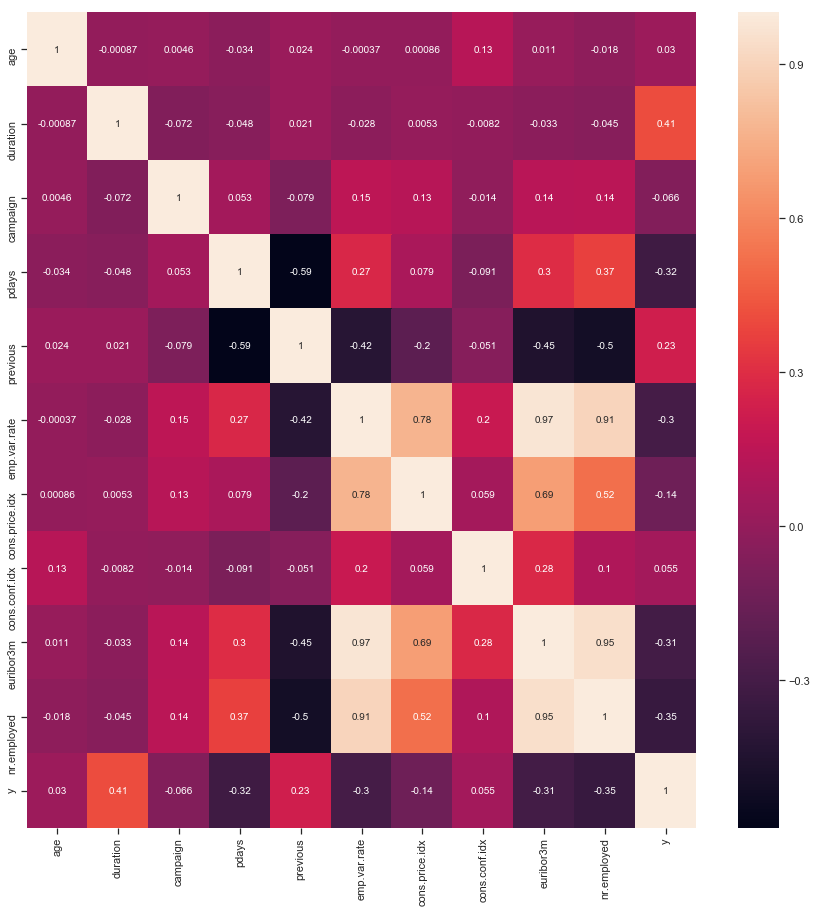

In [93]:
plt.figure(figsize=(15,15))
sns.heatmap(dataset.corr(), color = "k", annot=True)

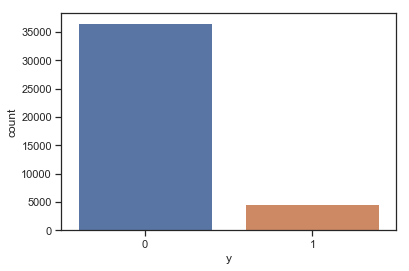

In [94]:
sns.countplot(x='y', data= dataset)

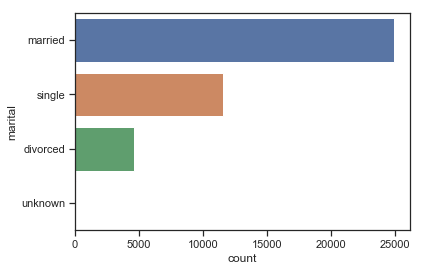

In [95]:
sns.countplot(y='marital', data=dataset)

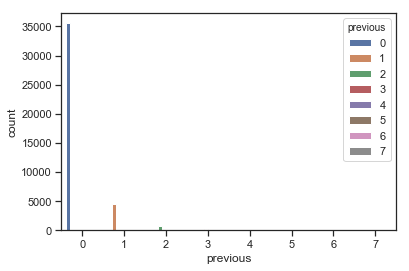

In [96]:
sns.countplot(x='previous', hue='previous', data=dataset)

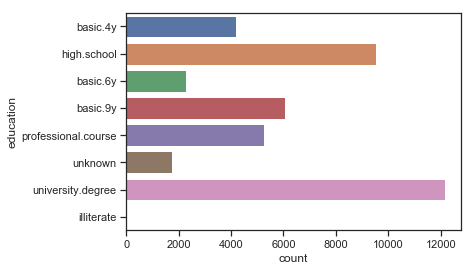

In [97]:
sns.countplot(y='education', data=dataset)

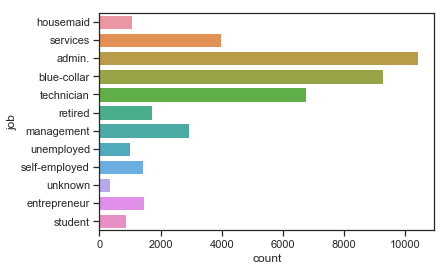

In [98]:
sns.set(style="ticks")
sns.countplot(y='job', data=dataset)

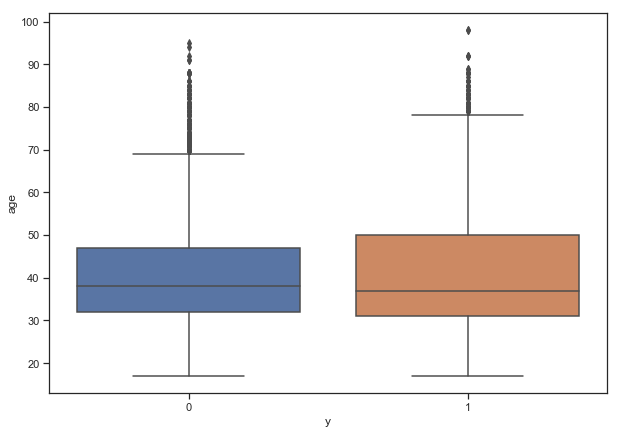

In [99]:
plt.figure(figsize=(10,7))
sns.boxplot(x="y", y="age",   data=dataset )

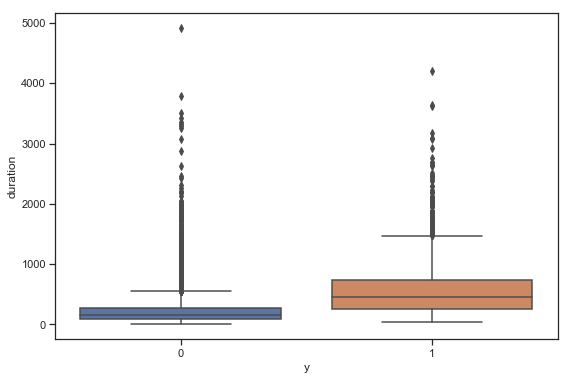

In [100]:
plt.figure(figsize=(9,6))
sns.boxplot(x='y', y='duration', data=dataset)

**If the call duration is higher, then it increases the chance of the term_deposit **

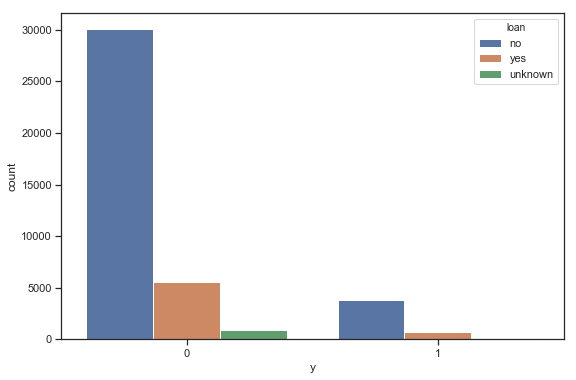

In [101]:
plt.figure(figsize=(9,6))
sns.countplot(x='y', hue='loan', data=dataset)

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
dataset[numeric] = scaler.fit_transform(dataset[numeric])

In [103]:
dataset = pd.get_dummies(dataset)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
age                              41188 non-null float64
duration                         41188 non-null float64
campaign                         41188 non-null float64
pdays                            41188 non-null float64
previous                         41188 non-null float64
emp.var.rate                     41188 non-null float64
cons.price.idx                   41188 non-null float64
cons.conf.idx                    41188 non-null float64
euribor3m                        41188 non-null float64
nr.employed                      41188 non-null float64
y                                41188 non-null int32
job_admin.                       41188 non-null uint8
job_blue-collar                  41188 non-null uint8
job_entrepreneur                 41188 non-null uint8
job_housemaid                    41188 non-null uint8
job_management                   41188 non-null uint8
job_ret

In [104]:
dataset_1= dataset.copy()
y = dataset['y']
dataset_1.drop(['y'],axis=1,inplace=True)
dataset_1.shape

(41188, 63)

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_1, y, test_size = .2, random_state = 100)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [106]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression() 
LR.fit(X_train,y_train)
pred_LR = LR.predict(X_test)
print(accuracy_score(y_test, pred_LR)*100)

91.21145909201263


In [109]:
y_pred = LR.predict(dataset_1)
y_matrix = confusion_matrix(y, y_pred)
pred_true = y_matrix[0][0] + y_matrix[0][1]
true_call = pred_true/dataset.shape[0]
print (true_call*100)
pred_no = y_matrix[1][0]+ y_matrix[1][1]
cost_reduce = pred_no/dataset.shape[0]
print(cost_reduce*100)

88.73458288821988
11.265417111780131


**Y% = 88.73**
*If we call using the model, it increases the chance of term deposits by 88.73%*
**X% = 11.26** 
*The model reduces cost by 11.26%*

In [110]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini')
DT.fit(X_train, y_train)
pred_DT = DT.predict(X_test)
print(accuracy_score(y_test, pred_DT)*100)

89.1964068948774


In [111]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 1000)
RF.fit(X_train, y_train)
pred_RF = RF.predict(X_test)
print(accuracy_score(y_test, pred_RF)*100)

91.55134741442097


In [112]:
y_pred = RF.predict(dataset_1)
y_matrix = confusion_matrix(y, y_pred)
pred_true = y_matrix[0][0] + y_matrix[0][1]
true_call = pred_true/dataset.shape[0]
print (true_call*100)
pred_no = y_matrix[1][0]+ y_matrix[1][1]
cost_reduce = pred_no/dataset.shape[0]
print(cost_reduce*100)

88.73458288821988
11.265417111780131


In [21]:
from sklearn.svm import SVC
#for this_gamma in [.01, 1.0, 10.0]:
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
pred_SVC = svc.predict(X_test)
print(accuracy_score(y_test, pred_SVC)*100)

89.9975722262685


In [22]:
from sklearn.svm import SVC
#for this_gamma in [.01, 1.0, 10.0]:
svc= SVC(kernel = 'linear', gamma = 1.0)
svc.fit(X_train, y_train)
pred_SVC_linear = svc.predict(X_test)
print(accuracy_score(y_test, pred_SVC_linear)*100)

90.47098810390871


Benefits from the model    
**Y% = 88.73**    
*If we call using the model, it increases the chance of term deposits by 88.73%*   
**X% = 11.26**     
*The model reduces cost by 11.26%*     
**If the call duration is higher, then it increases the chance of the term_deposit **